
   # Project:  Investigation of Medical Appointment No Shows Data                            

   Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction
- This dataset is a collection of medical appiontment in brazil and is focused on whether the patient shows up for the           appiontment or not.
- It consists of 110,527 medical appointments its 14 associated variables (characteristics).
- Our objective is to find out what are most important characteristics which are affecting the patient to not able to present in   the appiontment day.

The original problem description and data set can be found here: https://www.kaggle.com/joniarroba/noshowappointments/home



## Dataset Description

In [1]:
#set up import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.read_csv("Dataset.csv",sep = ",")

,Name,Value(s),Description
0,PatienID,number,identification of a patient
1,AppointmentID,number,identification of each appointment
2,Gender,F or M,'F' if female or 'M' if male
3,ScheduledDay,date,what day the patient set up their appointment
4,AppointmentDay,date,Day on which actual appiontment occurs
5,Age,number,how old is the patient
6,Neighbourhood,string,the location of the hospital
7,Scholarship,0 or 1,if the patient is enrolled in Brasilian welfar...
8,Hipertension,0 or 1,if the patient has hipertension
9,Diabetes,0 or 1,if the patient has diabetes


<a id='questions'></a>
## Questions 
1. How many percentage of patients are  show/no show ?
2. Is the people are most shown when waiting day is less?on which day most appoinment takes palce and what is no show rate for it?
3. how many poportion of male and female exit ? from them how many are no show ? i.e female-noshow,male-noshow
4. what is the age limit of show patients and no show patients.Does Age column has significant impact on no_show?
5. Which health condtioin patients(diabetes,alcoholism,hypertension) are mostly appearing for check up? How many hypertension/diabetes/alcoholism patients are shows up?
6. What is proportion of patients who shows up with 1 sms and more than 1 sms ?Is there are more patient with 1 sms or more than 1 sms?
7. how many handicap patient shows with 1 disability and with more than 1 disability? Whom have greater shown rate than other?
8. What are the factors which are in positively corelated with no show column?
9. Is patients are more shown up if they have  scholarship ?





<a id='wrangling'></a>
## Data Wrangling

-  Importing all the required data
-  Accessing data to identify any problems in the data's quality and structure.
-  Modifying,replacing or moving data to ensure that the dataset is high quality and well structured. 

summarizing observation of Data wrangling 

- No null entries present in the dataset
- Columns are renamed due to misspelling and wanting all are to be in same format
- No duplicate entry present in the dataset
- Converting patient id datatype float64 to int64
- Creating a new column of waiting days by getting the diff in appiontment day and scheduled day
- Dropping the age below 0 but found from kaggle discussion that -1 is for the pregnant woman but if the child is not born then also 
  we consider the patient as mother only and also there is only one entry so deleted it.
- Segregating the hanicap column values into 2 part one is a person having 1 disability and other is a person having more than 1 disability
  as I found for more than 2 disability there are very less person.


In [3]:
#loading data set
df = pd.read_csv("KaggleV2-May-2016[1].csv")

In [4]:
#checking shape of the data
df.shape

(110527, 14)

In [5]:
#finding out the null entries
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
#renaming column names with appropiate names
df.columns = ["patient_id","appointment_id","gender","scheduled_day","appointment_day","age","neighbourhood","scholarship","hypertension","diabetes","alcoholism","handicap","sms_received","no_show"]

In [8]:
#conforming the changes
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [9]:
#finding out the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
#checking for duplicates
df.duplicated().sum()

0

- patient id column analysis


In [11]:
df["patient_id"].describe()

count    1.105270e+05
mean     1.474963e+14
std      2.560949e+14
min      3.921784e+04
25%      4.172614e+12
50%      3.173184e+13
75%      9.439172e+13
max      9.999816e+14
Name: patient_id, dtype: float64

The values are float for better analysis converting them to integers 

In [12]:
#checking for the patient ids which are non integer
non_int_patient_id = df[~df.patient_id.apply(lambda x: x.is_integer())]

In [13]:
non_int_patient_id

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


In [14]:
#Coverting all the patient ids into integer
patient_ids = df.patient_id.values
for i in range(len(patient_ids)):
    patient_ids[i] = int(patient_ids[i])


In [15]:
#conforming the changes
(~df.patient_id.apply(lambda x: x.is_integer())).sum()

0

In [16]:
#changing datatype of patient id column to integer
df["patient_id"] = df["patient_id"].apply(np.int64)

In [17]:
#unique entries in patient id column
df.patient_id.nunique()

62299

In [18]:
type(df["patient_id"][0]) 

numpy.int64

appiontment id column analysis


In [19]:
#unique entries in appiontment  id column
df["appointment_id"].nunique()

110527

Gender column analysis 

In [20]:
df["gender"].unique()

array(['F', 'M'], dtype=object)

scheduled_day and appiontment_day  column analysis

In [21]:
df.scheduled_day.describe()

count                   110527
unique                  103549
top       2016-05-06T07:09:54Z
freq                        24
Name: scheduled_day, dtype: object

In [22]:
df.appointment_day.describe()

count                   110527
unique                      27
top       2016-06-06T00:00:00Z
freq                      4692
Name: appointment_day, dtype: object

In [23]:
#converting AppointmentDay , ScheduledDay types to date time
type(df["appointment_day"][0]),type(df["scheduled_day"][0])

(str, str)

In [24]:
df["appointment_day"]= pd.to_datetime(df["appointment_day"])
df["scheduled_day"]= pd.to_datetime(df["scheduled_day"])

In [25]:
#conforming the changes
type(df["appointment_day"][0]),type(df["scheduled_day"][0])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

In [26]:
#dropping the rows where appoinment day and schedule day is diff is in negative as it will not be possible
df[(df["appointment_day"].dt.date - df["scheduled_day"].dt.date) < "0 days"].count()
df.drop(df[(df["appointment_day"].dt.date - df["scheduled_day"].dt.date) < "0 days"].index,inplace = True)

In [27]:
#Schedule days time frames are given 
df.scheduled_day.dt.time

0         18:38:08
1         16:08:27
2         16:19:04
3         17:29:31
4         16:07:23
            ...   
110522    09:15:35
110523    07:27:33
110524    16:03:52
110525    15:09:23
110526    13:30:56
Name: scheduled_day, Length: 110522, dtype: object

In [28]:
 #Appiontment day time frames are missing
df["appointment_day"].dt.time

0         00:00:00
1         00:00:00
2         00:00:00
3         00:00:00
4         00:00:00
            ...   
110522    00:00:00
110523    00:00:00
110524    00:00:00
110525    00:00:00
110526    00:00:00
Name: appointment_day, Length: 110522, dtype: object

- Observation - Analysing time is not possible as Appiontment times are missing

In [29]:
#calculating waiting time betweent Appiontment day and scheduled day
df_waiting = ( df["appointment_day"].dt.date - df["scheduled_day"].dt.date)

In [30]:
#adding a new column of waiting time
df["waiting_days"] = df_waiting

In [31]:
df["waiting_days"]  = df["waiting_days"].dt.days

In [32]:
df["waiting_days"].astype(int)

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: waiting_days, Length: 110522, dtype: int32

Age column analysis

In [33]:
df["age"].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [34]:
#deleting -1 as min age - Age cann't be negative and also it is 1 entry so i don't think it will impact the result more
df.drop(df[df["age"] == -1].index,inplace = True)

In [35]:
#conforming the changes
df.shape

(110521, 15)

neighbourhood column analysis

In [36]:
df["neighbourhood"].describe()

count             110521
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object

- Maximum appiontments are done in JARDIM CAMBURI location.
- there are 81 unique records present

Hypertension,Diabetes and Alcoholism column analysis

In [37]:
df["hypertension"].unique()

array([1, 0], dtype=int64)

In [38]:
df["diabetes"].unique()

array([0, 1], dtype=int64)

In [39]:
df["alcoholism"].unique()

array([0, 1], dtype=int64)

Handicap column analysis

In [40]:
df["handicap"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

observation on Hanicap column

0 - person having 1 disability
1 - person having 2 disability like blindness and deaf and so on for 2,3,4


observation 
very less person having 2 or more disability so to analyse them in by spliting the columns into 2 parts 1st part with 
1 disability and 1 or more disability as anyways they are very less people so it will not impact my overall accuracy

In [41]:
#How many Handicap patient are present
df.groupby(["handicap","no_show"]).count()["age"]

handicap  no_show
0         No         86373
          Yes        21909
1         No          1676
          Yes          364
2         No           146
          Yes           37
3         No            10
          Yes            3
4         No             2
          Yes            1
Name: age, dtype: int64

In [42]:
df['handicap'] = np.where(df["handicap"] > 0,'1',df["handicap"])

In [43]:
#confroming the cahnges
df["handicap"].unique()

array(['0', '1'], dtype=object)

SMS_received column analysis

In [44]:
df["sms_received"].unique()

array([0, 1], dtype=int64)

No_show column analysis
 0 -  present 
 1 -  absent

In [45]:
#Replacing column with int values from string values
New_values = { "Yes" : 1 , "No" : 0}
df["no_show"]= df["no_show"].map(New_values)

<a id='eda'></a>
## Exploratory Data Analysis
- To analyzing data sets to summarizing main characteristics with clear visuals.
- Using matplotlib,pandas,seaborn for EDA.



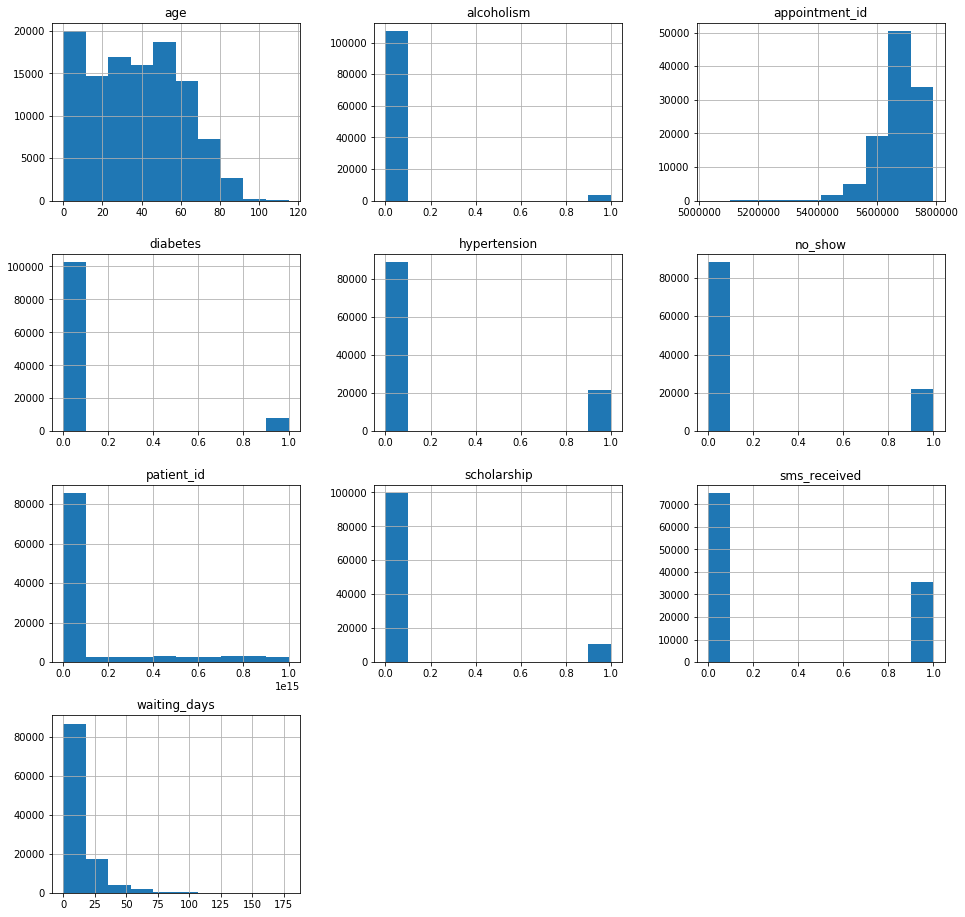

In [46]:
df.hist(figsize = (16,16));

Histogram observations 
- Age values are right skewed 50% of the ages are between 0-20 and 45-55.
- More Patients are present with alcoholism and diabetes rather than hypertension.
- Appionment id are left skewed but these are unique ids which are not dependent of show rate.
- More people are showed than no show.
- More people are with without scholarship.
- waiting days are right skewed --> mostly there are very less waiting days(0-20).

# How many percentage of patients are  show/no show ? 

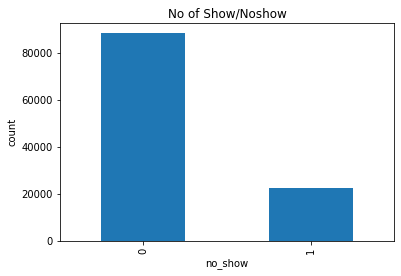

In [47]:
ax = df.groupby("no_show").size().plot(kind = "bar")
ax.set_title("No of Show/Noshow")
ax.set_ylabel("count")
ax;

In [48]:
#calculation how many percentage of people shows up and not shown up
per_shown = df.groupby("no_show").size()[0]/len(df) * 100
per_notshown = df.groupby("no_show").size()[1]/len(df) * 100
print("{} percentage of people shown and {} per of people not show".format(round(per_shown,2),round(per_notshown,2)))

79.81 percentage of people shown and 20.19 per of people not show


# Is the people are most shown when waiting day is less?on which day most appoinment takes palce and what is no show rate for it?

In [49]:
#dividing data into 2 parts 1.show patients 2.noshow patients
df_noshow = df[df["no_show"] == 1]
df_show = df[df["no_show"] == 0]

 - Visualizing no of waiting days of absent patients

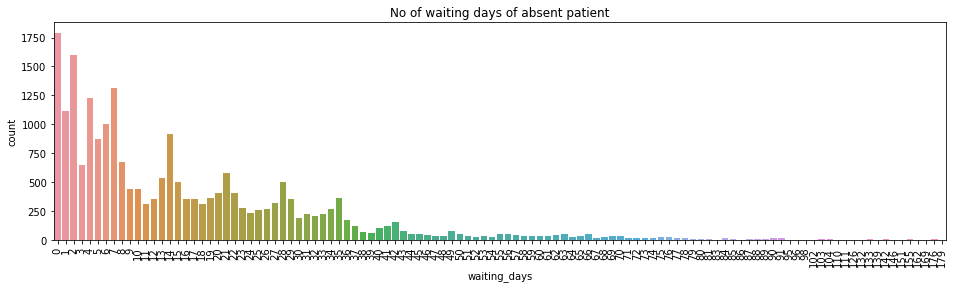

In [50]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_noshow.waiting_days)
ax.set_title("No of waiting days of absent patient")
plt.show()

 - Visualizing no of waiting days of present patients

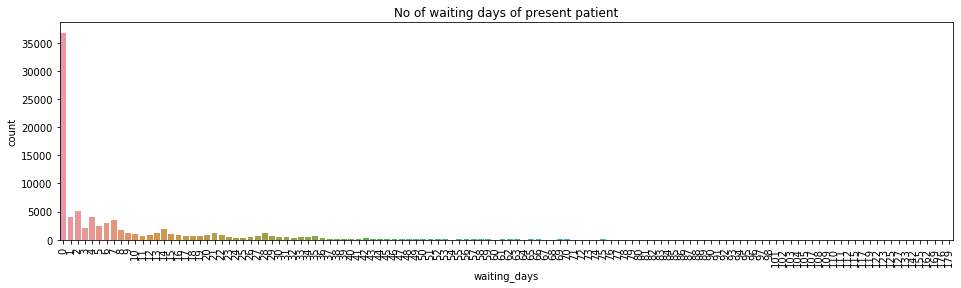

In [51]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_show.waiting_days)
ax.set_title("No of waiting days of present patient")
plt.show()

In [52]:
df_noshow["waiting_days"].describe()

count    22314.000000
mean        15.835484
std         16.605600
min          0.000000
25%          4.000000
50%         11.000000
75%         23.000000
max        179.000000
Name: waiting_days, dtype: float64

In [53]:
df_show["waiting_days"].describe()

count    88207.000000
mean         8.754759
std         14.550450
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: waiting_days, dtype: float64

#observation 
- clearly visible from the chart when the waiting days are less more paitent are present as for 75% of the data are =< 12 days waiting with mean 9.
- when the waiting days are more paitent are absent as 75% of the data are <= 23 days waiting with mean 16.

In [54]:
#Counting on which days patients are more absent
counts_noshow = df_noshow.appointment_day.dt.weekday_name.value_counts()
counts_noshow

Tuesday      5150
Wednesday    5092
Monday       4689
Friday       4037
Thursday     3337
Saturday        9
Name: appointment_day, dtype: int64

Analysis on which day patient are more

In [55]:
#Counting on which days patients are more showing
counts_show = df_show.appointment_day.dt.weekday_name.value_counts()
counts_show

Wednesday    20774
Tuesday      20488
Monday       18024
Friday       14982
Thursday     13909
Saturday        30
Name: appointment_day, dtype: int64

- Visualization of days on which appointment occurs for present patients

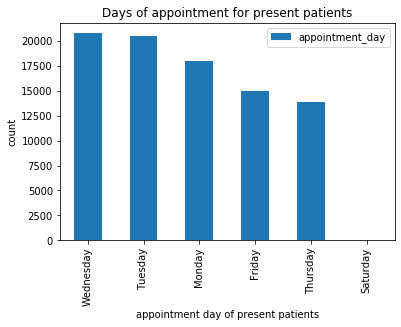

In [56]:
counts_show.plot(kind = "bar");
plt.legend(loc = "upper right")
plt.xlabel("appointment day of present patients");
plt.ylabel("count");
plt.title("Days of appointment for present patients");

- Visualization of days on which patients are absent  

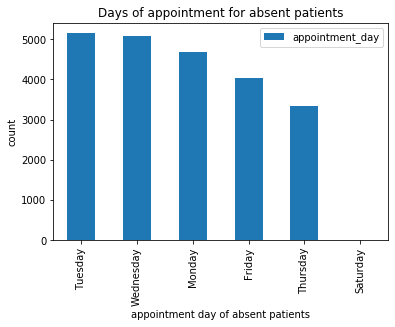

In [57]:
counts_noshow.plot(kind = "bar");
plt.legend(loc = "upper right")
plt.xlabel("appointment day of absent patients");
plt.ylabel("count");
plt.title("Days of appointment for absent patients");

observation - 
- The appionments done on satureday is less for both present and absent patients.
- Highest is on wednesday for present patient and Tuesday is the highest for Absent Patient.

# how many poportion of male and female exit ? from them how many are no show ? i.e female-noshow,male-noshow

In [58]:
#how many poportion of male and female exit
df_female = df.query('gender == "F"')
df_male = df.query('gender == "M"')
pro_f = len(df_female)/len(df)
pro_m = len(df_male)/len(df)
print("{} proportion of female and {} proportion of male present".format(round(pro_f,2),round(pro_m,2)))

0.65 proportion of female and 0.35 proportion of male present


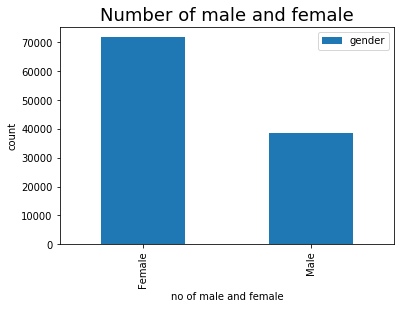

In [59]:
ax = df["gender"].value_counts().plot(kind = "bar");
ax.set_alpha(0.8)
ax.set_title("Number of male and female", fontsize=18)
ax.set_xlabel("no of male and female")
ax.set_ylabel("count")
plt.legend(loc = "upper right")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels);

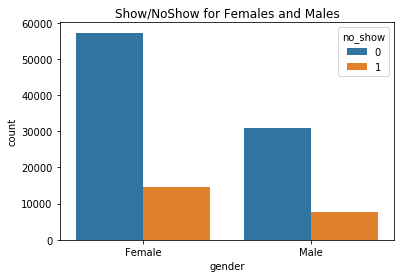

In [60]:
ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [61]:
# proportion of female present from all female and same for male
counts = df.groupby(["gender",'no_show']).count()
prop = counts/df.groupby(["gender"]).count()
prop["age"]

gender  no_show
F       0          0.796885
        1          0.203115
M       0          0.800362
        1          0.199638
Name: age, dtype: float64

From the above visualization we can clearly see that 'Female' patients usually have more appointments that 'Male' patients. So, Gender might be an important factor. But if we closely look at the NoShow distribution across Male's and Female's it is almost the same(i.e 80% show in both in male and female and rest absent). So, Gender may not play an important role in determining if a patient comes for a visit or not

# what is the age limit of show patients and no show patients.Does Age column has significant impact on no_show?

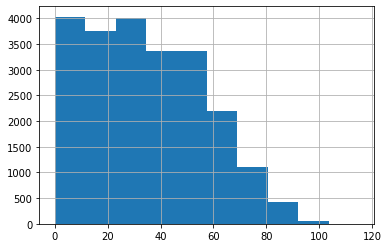

In [62]:
#age distribution for noshow patients
df_noshow["age"].hist();

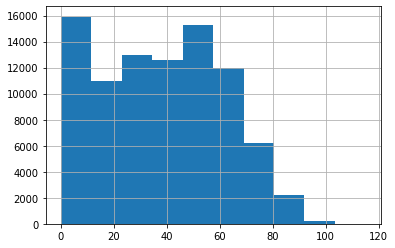

In [63]:
#age distribution for show patients
df_show["age"].hist();

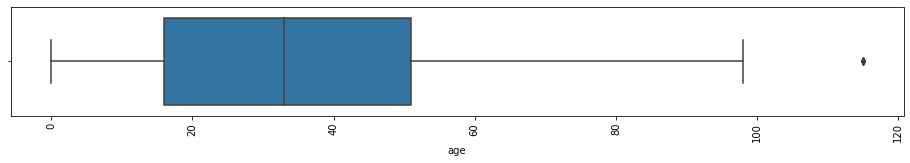

In [64]:
#box plot for noshow patients
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
sns.boxplot(x=df_noshow.age);

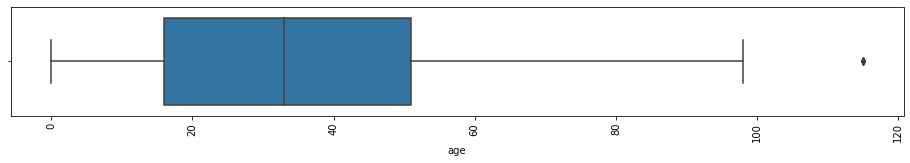

In [65]:
#box plot for show patients
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
sns.boxplot(x=df_noshow.age);

In [66]:
df_show["age"].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

In [67]:
df_noshow["age"].describe()

count    22314.000000
mean        34.317872
std         21.965009
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

 Result on age column
- Age has no imapct for not showing as it is cleary visible from histogram that for no show data max people of 0 age (new born)   baby are present which is same for show dataframe.
- both the distribution are right skewed.
- min,first Quartile,second quartile and third quartile are mostly equal with slight changes in values.

# Neighbourhood - For which neighbourhood show/noshow percentage is higher than other.

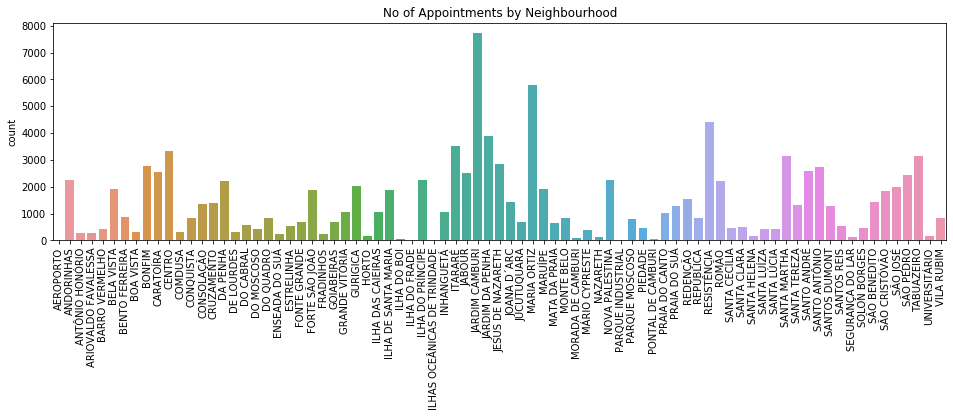

In [68]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.neighbourhood))
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

In [69]:
#calculating Percetage Show Up of Patients by Neighbourhood
df_n_ratio = df[df.no_show == 0].groupby(['neighbourhood']).size()/df.groupby(['neighbourhood']).size()

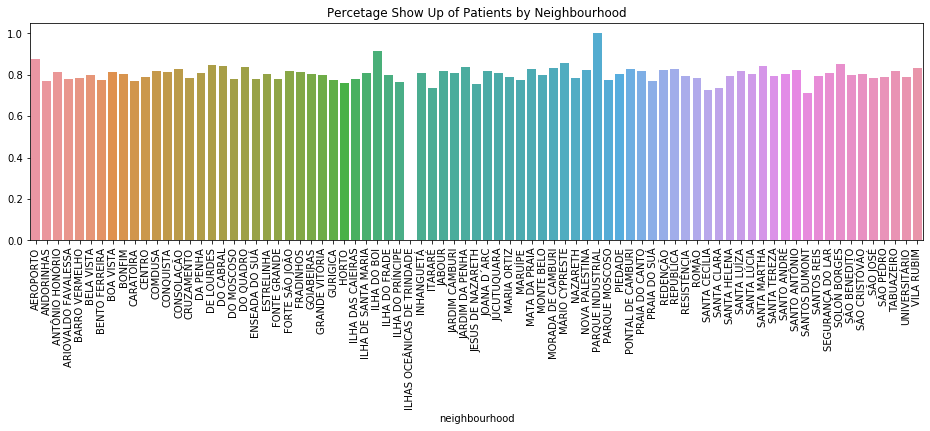

In [70]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_n_ratio.index, y=df_n_ratio)
ax.set_title("Percetage Show Up of Patients by Neighbourhood")
plt.show()

From the visualization it is clearly shown that every locality has almost 80% of show rate of patients.So,this feature is not much helping in decideing if the patient will show or not 

# Is patients are more shown up if they have  scholarship ?

In [71]:
#those who didn't get a Scholarship but shows up is 80% approx
df.groupby(["scholarship","no_show"]).count()["age"][0]/len(df[df["scholarship"] == 0])

no_show
0    0.801967
1    0.198033
Name: age, dtype: float64

In [72]:
#those who had a Scholarship and shows up is 76%
df.groupby(["scholarship","no_show"]).count()["age"][1]/len(df[df["scholarship"] == 1])

no_show
0    0.762637
1    0.237363
Name: age, dtype: float64

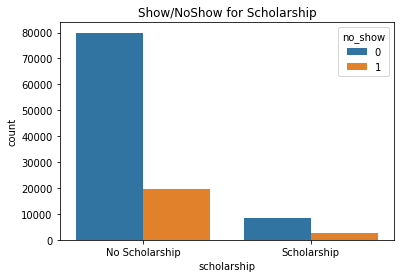

In [73]:
ax = sns.countplot(x=df.scholarship, hue=df.no_show, data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship','Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the bar chart it is clear that those who had a scholarship are very less population from the article got to know the peoples who got the schoalrship are poor people basically for that reason there is a very less population of that.but from them 76% shows up and no having scholarship 80% Shows up.
conclusion - Scholarship column has no effect on no show.

# Which health condtioin patients(diabetes,alcoholism,hypertension) are mostly appearing for check up? How many hypertension/diabetes/alcoholism patients are shows up?

In [74]:
#those who don't have hypertension but shows up is 79% approx
df.groupby(["hypertension","no_show"]).count()["age"][0]/len(df[df["hypertension"] == 0])


no_show
0    0.791005
1    0.208995
Name: age, dtype: float64

In [75]:
#those who have hypertension and shows up is 82%
df.groupby(["hypertension","no_show"]).count()["age"][1]/len(df[df["hypertension"] == 1])


no_show
0    0.82698
1    0.17302
Name: age, dtype: float64

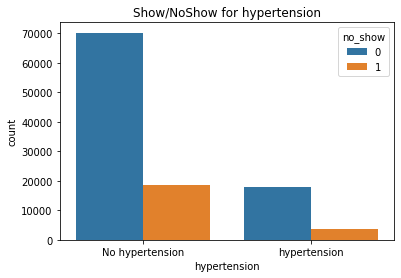

In [76]:
ax = sns.countplot(x=df.hypertension, hue=df.no_show, data=df)
ax.set_title("Show/NoShow for hypertension")
x_ticks_labels=['No hypertension','hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the bar chart it is shown that around 88000 patients having no hypertension and from them 79% came for visit.
- 22500 people having hypertension and from them 82% shows up
- Hypertension is affecting no show rate.

Diabetes column analysis

In [77]:
#those who don't have diabetes but shows up is 79% approx
df.groupby(["diabetes","no_show"]).count()["age"][0]/len(df[df["diabetes"] == 0])


no_show
0    0.796409
1    0.203591
Name: age, dtype: float64

In [78]:
#those who have diabetes and shows up is 82%
df.groupby(["diabetes","no_show"]).count()["age"][1]/len(df[df["diabetes"] == 1])


no_show
0    0.819967
1    0.180033
Name: age, dtype: float64

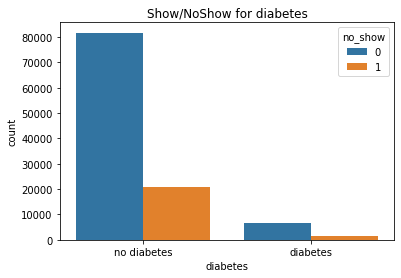

In [79]:
ax = sns.countplot(x=df.diabetes, hue=df.no_show, data=df)
ax.set_title("Show/NoShow for diabetes")
x_ticks_labels=['no diabetes','diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- out of 102578 people don't have diabetes 79% of them shows up.
- from 7900 patients having diabetes approx 82% shows up.
- Diabetes column has also imapctee no show rate.

Alcoholism column analysis

In [80]:
#those who don't have alcoholism but shows up is 79% approx
df.groupby(["alcoholism","no_show"]).count()["age"][0]/len(df[df["alcoholism"] == 0])


no_show
0    0.798089
1    0.201911
Name: age, dtype: float64

In [81]:
#those who have alcoholism and shows up is 82%
df.groupby(["alcoholism","no_show"]).count()["age"][1]/len(df[df["alcoholism"] == 1])


no_show
0    0.798512
1    0.201488
Name: age, dtype: float64

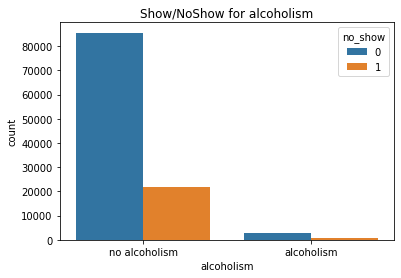

In [82]:
ax = sns.countplot(x=df.alcoholism, hue=df.no_show, data=df)
ax.set_title("Show/NoShow for alcoholism")
x_ticks_labels=['no alcoholism','alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- out of 107161 patients who are having not having alcoholism shows up for appiontment is 79%.
- from 3360 patients having alcoholism shows up are also 79%(approx).
- Alcoholism column has no significant impact on no show rate.

# What is proportion of patients who shows up with 1 sms and more than 1 sms ?Is there are more patient with 1 sms or more than 1 sms?

0 - person received 1 SMS
1 - person received morethan 1 SMS

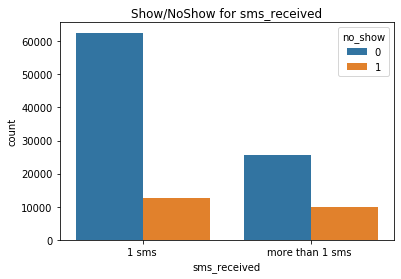

In [83]:
ax = sns.countplot(x=df.sms_received , hue=df.no_show, data=df)
ax.set_title("Show/NoShow for sms_received")
x_ticks_labels=['1 sms ','more than 1 sms ']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [84]:
#those who receives 1 sms and shows up is 83%
df.groupby(["sms_received","no_show"]).count()["age"][0]/len(df[df["sms_received"] == 0])


no_show
0    0.83302
1    0.16698
Name: age, dtype: float64

In [85]:
#those who received more than 1 sms and shows up is 72%
df.groupby(["sms_received","no_show"]).count()["age"][1]/len(df[df["sms_received"] == 1])


no_show
0    0.724255
1    0.275745
Name: age, dtype: float64

- 75000 patients who received  1 sms , 83% shows up from them.
- 35500 patients who received more than 1 sms , 72% shows up from them.

# how many handicap patient shows with 1 disability and with more than 1 disability? Whom have greater shown rate than other?

- 0 - person having 1 disability
- 1 - person having 2 disability like blindness and deaf and so on for 2,3,4
- very less person having 2 or more disability so to analyse them in by spliting the columns into 2 parts 1st part with 1 disability and 1 or more disability as anyways they are very less people in more than 1 disability so it will not impact the overall accuracy.

In [86]:
#repacing the hanicap column values with 1 where 2,3,4 present
df['handicap'] = np.where(~(df.handicap == '0'),'1',df.handicap)

In [87]:
#conforming the changes
df['handicap'].unique()

array(['0', '1'], dtype=object)

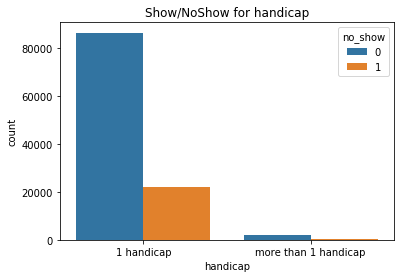

In [88]:
ax = sns.countplot(x=df.handicap, hue=df.no_show, data=df)
ax.set_title("Show/NoShow for handicap")
x_ticks_labels=['1 handicap','more than 1 handicap']
ax.set_xticklabels(x_ticks_labels)
plt.show()

observation -  
1. With more than 1 disability there are less people than with 1 disability
2. Absent is very high when a person is with more than 1 disability but with keen observation we get that proportion of people    shows with 1 disability and more than 1 disability as almost same( ~80%)
3. Handicap column has no significant effect on show rate.

#plotting Sctter matrix

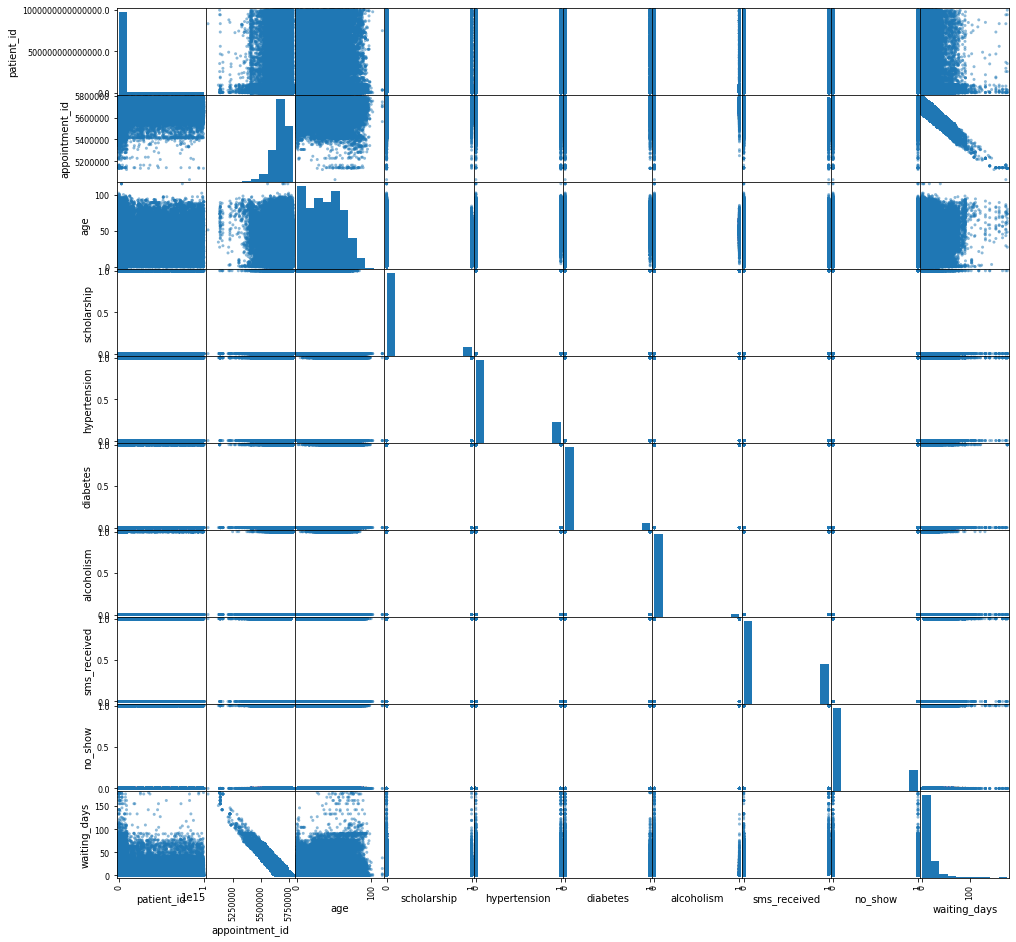

In [89]:
pd.plotting.scatter_matrix(df,figsize = (16,16));

# What are the factors which are in positively corelated with no show column?

In [90]:
#finding corelation coefficent
corrMatrix = df.corr()

In [91]:
corrMatrix["no_show"]

patient_id       -0.001477
appointment_id   -0.162619
age              -0.060320
scholarship       0.029166
hypertension     -0.035662
diabetes         -0.015158
alcoholism       -0.000181
sms_received      0.126502
no_show           1.000000
waiting_days      0.186320
Name: no_show, dtype: float64

- only sms_received and waiting_days colums have positive correlation with no_show
- correaltion coeff is also very small signifying these columns are very slightly depend upon no_show column 

<a id='conclusions'></a>
## Conclusions

So glad to analyze this dataset got some interesting results but if we have more information that is on which time appointment occurs
etc. then the results are more promising.
1. There are more females present than males as I see there are more infants in the dataset so might be a good    gynecologist/obstetrician presence attracts more infants females. 
2. But as the percentage of shown of both male and female are almost same so gender has no significant effect on no show.
3. More people are present in the age of 0-10 and 50-55 for no show most people are between 0-10 and 25-35.
4. I don't think age has more impact on no show as a mean value of age for no show data and show data are almost the same.
5. Every locality in the neighborhood has almost 80% of the show rate of patients. So, this feature is not much helping in  deciding if the patient will show or not.
6. Schedule day starts from 2015-11-10 and ends at 2016-06-08.
7. The Appointment day starts at 2016-04-29 and ends at 2016-06-08.
8. Most of the people are shown when the scheduled day and appointment day is the same.
9. When the waiting days are less more people likely to show for appointment.
10. Very small no of scheduling is done on Saturday and no on Sunday it is the same for appointment day.
11. The highest people scheduled on Wednesday and the highest people showed up on Tuesday for an appointment.
12. There are more diabetes and alcoholism patients are present rather than hypertension.
13. Hypertension and diabetes affect if the person will show or not but alcoholism have no impact.
14. There are more people with 1 disability but shown percentage for 1 and more than 1 disability are almost the same. We can say that handicap has no impact on the show rate.
15. Appointment day has a large negative correlation on no show column as they are unique ids for each appointment. Dropping the column will not impact show rate.
16. There are very few people present with Scholarship as they are provided to very poor people found from the reference below provided on Kaggle.
17. 80% of people show with no scholarship and 76% of people show up with Scholarship.so to conclude anything is very difficult.
18. 83% shows up with receiving 1 SMS and 72% shows up with receiving more than SMS.
19. Maybe those who received more than 1 SMS their appointment dates are changed to the new date for that reason their shown prob is less.
20. Approx 20% didn't appear for the appointment.
21. Only waiting days and sms_received has a positive correlation with no show column.

<a id='Reference'></a>
 ## Reference

1. Python for Data Analysis Book by Wes McKinney
2. https://www.kaggle.com/joniarroba/noshowappointments
3. For scholarship column = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
4. Pandas Documentation
5. Matplotlib Documentation
6. Numpy Documentation
7. Seaborn Documentation
8. StackOverflow for any query